In [4]:
import pandas as pd
import nltk
nltk.download('stopwords')
import string
from nltk.corpus import stopwords
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\laksh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
amaze = pd.read_csv("HondaAmaze Review.csv")
venue = pd.read_csv("Hyundai Venue.csv")
ecosport = pd.read_csv("Ford EcoSport.csv")
seltos = pd.read_csv("Kia Seltos.csv")
scorpio = pd.read_csv("Mahindra Scorpio.csv")
baleno = pd.read_csv("Maruti Suzuki Baleno.csv")

In [6]:
amaze

Unnamed: 0                                  Review Title  \
0             0                                 Desirable car   
1             1                   Best car I recommend to all   
2             2                Amazing car for Nuclear Family   
3             3                         One word - practical.   
4             4                         Best in it's Segment.   
..          ...                                           ...   
605         605  Looks good but mileage is ridiculously low!!   
606         606                           Amazing amaze !!!!!   
607         607                   2 test drives of New amaze.   
608         608                       Best in class automatic   
609         609                 A WAIF OF FRESH AIR IN DESIGN   

                                                Review     Car Name  
0    As I experienced the amaze is one the best car...  Honda Amaze  
1    I bought this car in 2018 .I have no problem w...  Honda Amaze  
2    It's best sub compact sedan car , spacious ,mi...  Honda Amaze  
3    Start from outside looks - you don't need my w...  Honda Amaze  
4    Before buying this car I am not much sure abou...  Honda Amaze  
..                                                 ...          ...  
605  Look wise car is awesome but I'm getting 8kmpl...  Honda Amaze  
606  Exterior The led positioning lamps look very b...  Honda Amaze  
607  Exterior Overall: Positive feeling.\nPros:\n1....  Honda Amaze  
608  Had a short test drive, diesel automatic is th...  Honda Amaze  
609  Exterior Captivating AND GIVES THE LOOK OF A B...  Honda Amaze  

[610 rows x 4 columns]

In [7]:
venue

Unnamed: 0                                     Review Title  \
0             0                                  Value for money   
1             1                                         Good car   
2             2                       Hyundai Venue Sport review   
3             3  VENUE S1.2 - A Trustworthy and Price worthy Car   
4             4          Airbag quality of this car is not good.   
..          ...                                              ...   
795         795                                    Excellent car   
796         796          Eye catching car, hitting the deck hard   
797         797                       Venue has to be facelifted   
798         798                      Hyundai at it's great VENUE   
799         799                                  NOT THAT CLASSY   

                                                Review       Car Name  
0    I found this car as Value for money and class ...  Hyundai Venue  
1    Experience is good to this car, good performan...  Hyundai Venue  
2    Good car with turbo engine buy if you want Cre...  Hyundai Venue  
3    At first purchase experience, I bought my cham...  Hyundai Venue  
4    Hyundai airbag quality is worst. after a huge ...  Hyundai Venue  
..                                                 ...            ...  
795  Ecelant looking this car.Extra ordinary car.Th...  Hyundai Venue  
796  Wonderful car , hitting the deck hard Smooth s...  Hyundai Venue  
797  I dislike because of following cons 1. Suitabl...  Hyundai Venue  
798  It's good package and value for money vehicle....  Hyundai Venue  
799  DASHBOARD SIZE VERY SMALL.VERY POOR SPACE IN R...  Hyundai Venue  

[800 rows x 4 columns]

In [8]:
scorpio

Unnamed: 0                      Review Title  \
0             0                      Just awesome   
1             1                 Very nice segment   
2             2           Mahindra Scorpio review   
3             3                         The Beast   
4             4                   Value money car   
..          ...                               ...   
508         508   Not a comfortable car to drive.   
509         509               The True Indian SUV   
510         510               Scorpio Great Story   
511         511  Don’t even think it in your list   
512         512                   offroading king   

                                                Review          Car Name  
0    It is my childhood dream car I just loved it I...  Mahindra Scorpio  
1    Driving experience is very nice and also comfo...  Mahindra Scorpio  
2    Comfortable car, It was a my dream car and I b...  Mahindra Scorpio  
3    I bought this second hand car and I love this ...  Mahindra Scorpio  
4    Super and fully safety car, value for money, 5...  Mahindra Scorpio  
..                                                 ...               ...  
508  Very less riding comfort.body roll is huge.I s...  Mahindra Scorpio  
509  I am owning this car since 2015. It is a very ...  Mahindra Scorpio  
510  The car is monster. My father purchased car in...  Mahindra Scorpio  
511  Mahindra is asking out of world price for this...  Mahindra Scorpio  
512  It will good driving experience in hills solid...  Mahindra Scorpio  

[513 rows x 4 columns]

In [9]:
baleno

Unnamed: 0                     Review Title  \
0             0      Maruti Suzuki Baleno review   
1             1                    Excellent car   
2             2                    Baleno review   
3             3                       Baleno car   
4             4  Car that can be modified easily   
..          ...                              ...   
995         995       How is the josh for Baleno   
996         996                         Best car   
997         997       Great Car, value for money   
998         998                           superb   
999         999                           Govind   

                                                Review              Car Name  
0    My buying experience was great, driving of Bal...  Maruti Suzuki Baleno  
1    Excellent work over all performance good .I ha...  Maruti Suzuki Baleno  
2    Overall good performance, build quality need t...  Maruti Suzuki Baleno  
3    Amazing car, smooth driving like luxury, I lov...  Maruti Suzuki Baleno  
4    1. Buying experience was good by Competent Nex...  Maruti Suzuki Baleno  
..                                                 ...                   ...  
995  Best thing i love about this car is its looks,...  Maruti Suzuki Baleno  
996  Best car in this budget Best look and setting ...  Maruti Suzuki Baleno  
997  Nice look and great performance in drive, My d...  Maruti Suzuki Baleno  
998  Superb car..with stylish exterior and AC also ...  Maruti Suzuki Baleno  
999  Buying experience: I am not buying this car bu...  Maruti Suzuki Baleno  

[1000 rows x 4 columns]

In [10]:
ecosport

Unnamed: 0                                     Review Title  \
0             0                                            Gazab   
1             1                             Ford EcoSport review   
2             2                         It's good in your budget   
3             3                                  The drivers car   
4             4                    Ecosport Thunder edition 202,   
..          ...                                              ...   
341         341                     The most fun to drive car!!!   
342         342                  Award to Ecosport as a customer   
343         343                                    Ford Ecosport   
344         344                Grab this car and enjoy your ride   
345         345  Very much better than other cars in the segment   

                                                Review       Car Name  
0    Awesome car very comfortable very very good sm...  Ford EcoSport  
1    The car was good looking big with excellent fe...  Ford EcoSport  
2    Driving & performance is good, budget car whic...  Ford EcoSport  
3    Dealer was very cordial and friendly, steering...  Ford EcoSport  
4    This is my first car. Driving comfort is so ni...  Ford EcoSport  
..                                                 ...            ...  
341  It's always been a great experience for owning...  Ford EcoSport  
342  We bought a top end model as per my wish its w...  Ford EcoSport  
343  The Ford Ecosport vehicle is one of the best c...  Ford EcoSport  
344  1. It is worth to putting your money to this c...  Ford EcoSport  
345  It's been a time since I had purchased the For...  Ford EcoSport  

[346 rows x 4 columns]

In [11]:
seltos

Unnamed: 0                                       Review Title  \
0             0                                    Nice experience   
1             1                   Mercedes for middle class people   
2             2                                   The best machine   
3             3  Kia top end variant with low quality and cheap...   
4             4                                           Nice car   
..          ...                                                ...   
539         539                          Where are the airbags ???   
540         540                         Kia have done the job well   
541         541                                      Best in class   
542         542                     New Generation Premium Suv Car   
543         543                              Mr.Animesh car freek.   

                                                Review    Car Name  
0    Driving with kia is better than MG or any othe...  Kia Seltos  
1    Its a great low maintenance car which gives a ...  Kia Seltos  
2    The best SUV in india. After driving this car ...  Kia Seltos  
3    Kia provides cheap low quality and non reliabl...  Kia Seltos  
4    High maintenance car, good look, sport car, go...  Kia Seltos  
..                                                 ...         ...  
539  Messed up variant list, not offering even 4 ai...  Kia Seltos  
540  Awesome car with lot of features loaded and dr...  Kia Seltos  
541  An amazing car with muscular body structure an...  Kia Seltos  
542  The car is a Premium suv car. To improve our s...  Kia Seltos  
543  The dream car with all the latest features is ...  Kia Seltos  

[544 rows x 4 columns]

In [12]:
#concatenating all rviews into on dataframe
reviews = pd.concat([amaze,ecosport,venue,seltos,scorpio,baleno],ignore_index=True,sort=False)

reviews

Unnamed: 0                    Review Title  \
0              0                   Desirable car   
1              1     Best car I recommend to all   
2              2  Amazing car for Nuclear Family   
3              3           One word - practical.   
4              4           Best in it's Segment.   
...          ...                             ...   
3808         995      How is the josh for Baleno   
3809         996                        Best car   
3810         997      Great Car, value for money   
3811         998                          superb   
3812         999                          Govind   

                                                 Review              Car Name  
0     As I experienced the amaze is one the best car...           Honda Amaze  
1     I bought this car in 2018 .I have no problem w...           Honda Amaze  
2     It's best sub compact sedan car , spacious ,mi...           Honda Amaze  
3     Start from outside looks - you don't need my w...           Honda Amaze  
4     Before buying this car I am not much sure abou...           Honda Amaze  
...                                                 ...                   ...  
3808  Best thing i love about this car is its looks,...  Maruti Suzuki Baleno  
3809  Best car in this budget Best look and setting ...  Maruti Suzuki Baleno  
3810  Nice look and great performance in drive, My d...  Maruti Suzuki Baleno  
3811  Superb car..with stylish exterior and AC also ...  Maruti Suzuki Baleno  
3812  Buying experience: I am not buying this car bu...  Maruti Suzuki Baleno  

[3813 rows x 4 columns]

In [13]:
#dropping unnamed column
reviews.drop('Unnamed: 0',axis=1,inplace=True)

In [14]:
stop = set(stopwords.words('english'))


In [15]:
#Function to remove punctution
def cleanpunc(sentence):
    cleaned=re.compile(r'[?|!|\'|"|#|.|,|)|(|\|/|]')
    clean_ed=re.sub(cleaned," ",sentence)
    return clean_ed

In [16]:
def decontracted(phrase):
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [17]:
from tqdm import tqdm
preprocessed_reviews = []

for sentance in tqdm(reviews['Review'].values):
    sentance = decontracted(sentance) 
    sentance = cleanpunc(sentance) #cleaning punctuation
    sentance = re.sub('[^A-Za-z0-9]+', ' ', sentance) #special characters
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stop) #lower case and removing stop words
    preprocessed_reviews.append(sentance.strip("'"))
    
preprocessed_reviews

100%|███████████████████████████████████████████████████████████████████████████| 3813/3813 [00:00<00:00, 12926.22it/s]


['experienced amaze one best car price range comfortable desirable everyone mileage better compared others finally good experience',
 'bought car 2018 problem car mileage awesome powerful engine comfortable silent gear hard service cost little expensive car cross 75000 kms without problem best car long time owners',
 'best sub compact sedan car spacious mileage refined engine comfortable ride best service best price best making quality good boot space best leg room thai support',
 'start outside looks need word stunning look ugly shaped babies brands would sure designers snoring drugs nose interiors diverse competition long term gets work done ride handling little tight steering comparison hyundai dynamics great far sedan 4m stiff suspension gives composed feels engine noisy makes gem city ride also gives amazing fuel economy 20 km l city highways get 25 km l even 1 5 lakhs odometer boot practical part think dislike car sit city bigger car',
 'buying car much sure performance using 2 y

In [18]:
reviews['preprocessed_reviews']=preprocessed_reviews

reviews

Review Title  \
0                      Desirable car   
1        Best car I recommend to all   
2     Amazing car for Nuclear Family   
3              One word - practical.   
4              Best in it's Segment.   
...                              ...   
3808      How is the josh for Baleno   
3809                        Best car   
3810      Great Car, value for money   
3811                          superb   
3812                          Govind   

                                                 Review              Car Name  \
0     As I experienced the amaze is one the best car...           Honda Amaze   
1     I bought this car in 2018 .I have no problem w...           Honda Amaze   
2     It's best sub compact sedan car , spacious ,mi...           Honda Amaze   
3     Start from outside looks - you don't need my w...           Honda Amaze   
4     Before buying this car I am not much sure abou...           Honda Amaze   
...                                                 ...                   ...   
3808  Best thing i love about this car is its looks,...  Maruti Suzuki Baleno   
3809  Best car in this budget Best look and setting ...  Maruti Suzuki Baleno   
3810  Nice look and great performance in drive, My d...  Maruti Suzuki Baleno   
3811  Superb car..with stylish exterior and AC also ...  Maruti Suzuki Baleno   
3812  Buying experience: I am not buying this car bu...  Maruti Suzuki Baleno   

                                   preprocessed_reviews  
0     experienced amaze one best car price range com...  
1     bought car 2018 problem car mileage awesome po...  
2     best sub compact sedan car spacious mileage re...  
3     start outside looks need word stunning look ug...  
4     buying car much sure performance using 2 years...  
...                                                 ...  
3808  best thing love car looks performance design n...  
3809  best car budget best look setting colour overa...  
3810  nice look great performance drive dream car wa...  
3811  superb car stylish exterior ac also good sound...  
3812  buying experience buying car freind buying rid...  

[3813 rows x 4 columns]

In [19]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\laksh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [20]:
from nltk.sentiment import SentimentIntensityAnalyzer

def sentiment_score(sentance):
    sentiment = SentimentIntensityAnalyzer()
    return sentiment.polarity_scores(sentance)['compound']


reviews['vader_score'] = reviews['preprocessed_reviews'].apply(sentiment_score)
reviews['vader_rating'] = pd.cut(reviews['vader_score'],bins = 5,labels = [1,2,3,4,5])


from textblob import TextBlob

def textblob_score(sentence):
    return TextBlob(sentence).sentiment.polarity
reviews['textblob_score'] = reviews['preprocessed_reviews'].apply(textblob_score)
reviews['textblob_rating'] = pd.cut(reviews['textblob_score'],bins = 5,labels = [1,2,3,4,5])

In [21]:
reviews

Review Title  \
0                      Desirable car   
1        Best car I recommend to all   
2     Amazing car for Nuclear Family   
3              One word - practical.   
4              Best in it's Segment.   
...                              ...   
3808      How is the josh for Baleno   
3809                        Best car   
3810      Great Car, value for money   
3811                          superb   
3812                          Govind   

                                                 Review              Car Name  \
0     As I experienced the amaze is one the best car...           Honda Amaze   
1     I bought this car in 2018 .I have no problem w...           Honda Amaze   
2     It's best sub compact sedan car , spacious ,mi...           Honda Amaze   
3     Start from outside looks - you don't need my w...           Honda Amaze   
4     Before buying this car I am not much sure abou...           Honda Amaze   
...                                                 ...                   ...   
3808  Best thing i love about this car is its looks,...  Maruti Suzuki Baleno   
3809  Best car in this budget Best look and setting ...  Maruti Suzuki Baleno   
3810  Nice look and great performance in drive, My d...  Maruti Suzuki Baleno   
3811  Superb car..with stylish exterior and AC also ...  Maruti Suzuki Baleno   
3812  Buying experience: I am not buying this car bu...  Maruti Suzuki Baleno   

                                   preprocessed_reviews  vader_score  \
0     experienced amaze one best car price range com...       0.9590   
1     bought car 2018 problem car mileage awesome po...       0.2575   
2     best sub compact sedan car spacious mileage re...       0.9847   
3     start outside looks need word stunning look ug...       0.8074   
4     buying car much sure performance using 2 years...       0.9637   
...                                                 ...          ...   
3808  best thing love car looks performance design n...       0.9816   
3809  best car budget best look setting colour overa...       0.9477   
3810  nice look great performance drive dream car wa...       0.9552   
3811  superb car stylish exterior ac also good sound...       0.9531   
3812  buying experience buying car freind buying rid...       0.8658   

     vader_rating  textblob_score textblob_rating  
0               5        0.680000               5  
1               4        0.167083               3  
2               5        0.871429               5  
3               5        0.097470               3  
4               5        0.625000               4  
...           ...             ...             ...  
3808            5        0.350000               4  
3809            5        0.740000               5  
3810            5        0.341667               4  
3811            5        0.438889               4  
3812            5        0.381250               4  

[3813 rows x 8 columns]

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

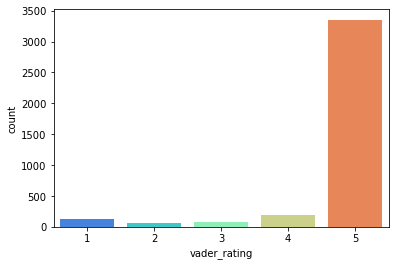

In [23]:
sns.countplot(x='vader_rating',data=reviews,palette='rainbow')

In [24]:
sns.countplot(x='textblob_rating',data=reviews,palette='rainbow')

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [26]:
X = reviews['preprocessed_reviews']
y_vader = reviews['vader_rating']
y_textblob = reviews['textblob_rating']

In [27]:
X = cv.fit_transform(X)

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [29]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X,y_vader,test_size=0.3,random_state=101)
X2_train, X2_test, y2_train, y2_test = train_test_split(X,y_textblob,test_size=0.3,random_state=101)

In [30]:
nb = MultinomialNB()

In [31]:
nb.fit(X1_train,y1_train)
nb.fit(X2_train,y2_train)

MultinomialNB()

In [32]:
pred_vader = nb.predict(X1_test)
pred_textblob = nb.predict(X2_test)

In [36]:
from sklearn.metrics import confusion_matrix,classification_report

print('VADER EVALUATION')
print('\n')
print(confusion_matrix(pred_vader,y1_test))
print('\n')
print(classification_report(pred_vader,y1_test))

VADER EVALUATION


[[  0   0   0   0   0]
 [  0   1   1   1   0]
 [ 36  22  17  31 126]
 [  3   3   8  27 851]
 [  1   1   2   2  11]]


              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.04      0.33      0.07         3
           3       0.61      0.07      0.13       232
           4       0.44      0.03      0.06       892
           5       0.01      0.65      0.02        17

    accuracy                           0.05      1144
   macro avg       0.22      0.22      0.06      1144
weighted avg       0.47      0.05      0.07      1144



C:\Users\laksh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\laksh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\laksh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
print('TEXTBLOB EVALUATION')
print('\n')
print(confusion_matrix(pred_textblob,y2_test))
print('\n')
print(classification_report(pred_textblob,y2_test))

TEXTBLOB EVALUATION


[[  0   0   0   0   0]
 [  0   2   1   0   0]
 [  9  38 133  51   1]
 [  0   3 146 607 136]
 [  0   0   6  10   1]]


              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.05      0.67      0.09         3
           3       0.47      0.57      0.51       232
           4       0.91      0.68      0.78       892
           5       0.01      0.06      0.01        17

    accuracy                           0.65      1144
   macro avg       0.29      0.40      0.28      1144
weighted avg       0.80      0.65      0.71      1144



C:\Users\laksh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\laksh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\laksh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
